Production cross sections in leptophobic Zp process
====

In [1]:
#!ls /project/HEP_EF/B2G/ZP_Runs

In [2]:
import ROOT as R
import numpy as np
#from EzLheReader import EzLheReader
import os
from os.path import exists
from subprocess import check_output

Welcome to JupyROOT 6.28/00


In [3]:
#rundir="/project/HEP_EF/B2G/ZP_Runs_v2_9_111"
#runs1=[x for x in os.listdir(rundir) if x.startswith("Zp") and x.endswith("1_HpT0")]
#runs1.sort(key=lambda x:int(x.split("_")[1]))
#runs200=[x for x in os.listdir(rundir) if x.startswith("Zp") and x.endswith("200_HpT0")]
#runs200.sort(key=lambda x:int(x.split("_")[1]))

#gr1 = R.TGraph2D()
#gr1.SetTitle("NS=1 Cross Sections;mZp;mNd;XS (pb)")
#N=0
#for run in runs1:
#    lhefile=f"{rundir}/{run}/Events/run_01/unweighted_events.lhe.gz"
#    if not exists(lhefile): continue  # temp hack while files are copying
#    #reader=EzLheReader(lhefile, quiet=True) 
#    #xs=reader.xs
#    mzp=float(run.split("_")[1])
#    mnd=float(run.split("_")[2])
#    xs=float(check_output(['zgrep','\(pb\)',lhefile]).strip().split()[-1])
#    gr1.SetPoint(N,mzp,mnd,xs)
#    N=N+1
#    if mzp%1000==0 and mnd%200==0: print(f"{mzp}, {mnd}, 1, {xs}") # show progress

In [4]:
import numpy as np
data = np.loadtxt("XS.table")
runs1 = np.array([x for x in data if x[2] == 1])
runs200 = np.array([x for x in data if x[2] == 200])

In [5]:
gr1 = R.TGraph2D()
gr1.SetTitle("NS=1 Cross Sections;mZp;mNd;XS (pb)")
N=0
for run in runs1:
    mzp=run[0]
    mnd=run[1]
    gr1.SetPoint(N,mzp,mnd,run[3])
    N=N+1

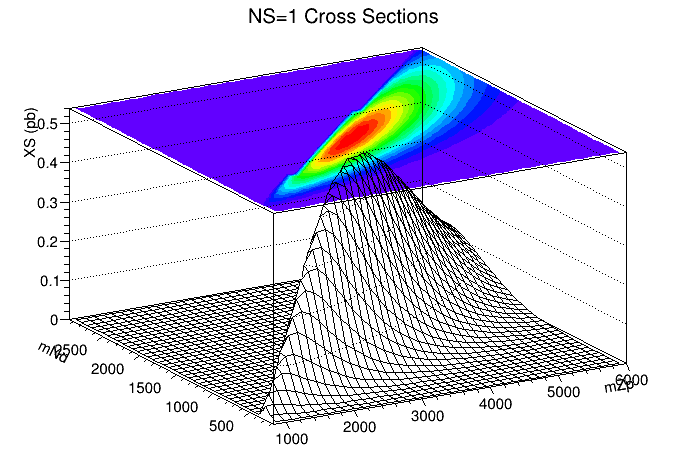

In [6]:
%jsroot off
gr1.Interpolate(3750,900)
R.gStyle.SetPalette(1)
gr1.SetMarkerStyle(20)
tc=R.TCanvas()
gr1.Draw("surf3")
tc.Draw()

In [7]:
gr200 = R.TGraph2D()
gr200.SetTitle("NS=200 Cross Sections;mZp;mNd;XS (pb)")
N=0
for run in runs200:
    mzp=run[0]
    mnd=run[1]
    gr200.SetPoint(N,mzp,mnd,run[3])
    N=N+1

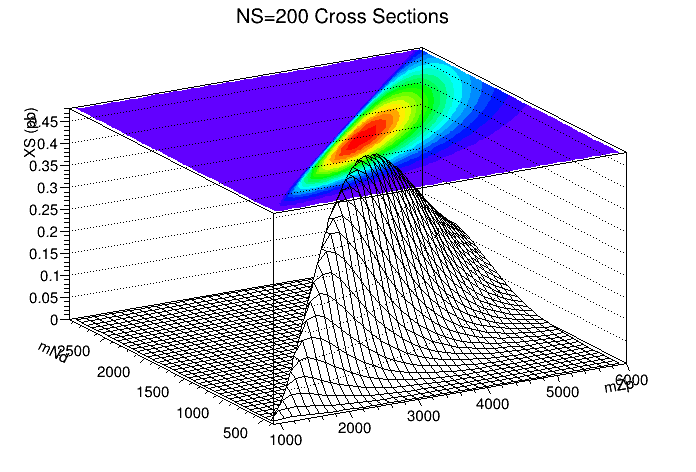

In [8]:
gr200.Interpolate(3750,1000)
tc=R.TCanvas()
gr200.Draw("surf3")
tc.Draw()

In [9]:
tf=R.TFile("anomCS.root","recreate")
gr1.Write("gr1")
gr200.Write("gr200")
tf.Close()

Extrapolation plots
==

In [10]:
tf=R.TFile("anomCS.root")
tf.ls()

TFile**		anomCS.root	
 TFile*		anomCS.root	
  KEY: TGraph2D	gr1;1	NS=1 Cross Sections;mZp;mNd;XS (pb)
  KEY: TGraph2D	gr200;1	NS=200 Cross Sections;mZp;mNd;XS (pb)


In [11]:
tc2=R.TCanvas()
gr1=tf.Get("gr1")  # NS = 1GeV
gr200=tf.Get("gr200")  # NS = 200GeV

In [12]:
def GetRange(tg2d):
    xmin=tg2d.GetXmin() # mZp's
    xmax=tg2d.GetXmax()
    ymin=tg2d.GetYmin() # mNd's
    ymax=tg2d.GetYmax()
    return xmin,xmax,ymin,ymax

Plot graphs of xs vs mZp for several Nd, Ns masses.

In [13]:
tc=R.TCanvas()
tm=R.TMultiGraph()
tm.SetTitle("Interpolated cross sections gZp=0.4;m_Zp;pb")

ndvals=[375,750,1500,2000]
tgs=[]
npoints=250

# mNs=200
mZpmin,mZpmax,mNdmin,mNdmax = GetRange(gr200)
#print(mZpmin,mZpmax,mNdmin,mNdmax)
col=0
for nd in ndvals:
    tg=R.TGraph()
    col=col+1
    tg.SetLineColor(col)
    tg.SetTitle(f"mND={nd}, mNs=200")
    N=0
    for zp in np.linspace(mZpmin,mZpmax,npoints):
        if nd>=zp/2: continue
        tg.SetPoint(N,zp,gr200.Interpolate(zp,nd))
        N=N+1
    tgs.append(tg.Clone())
    tm.Add(tgs[-1],"l")

# mNs=1
mZpmin,mZpmax,mNdmin,mNdmax = GetRange(gr1)
#print(mZpmin,mZpmax,mNdmin,mNdmax)
col=0
for nd in ndvals:
    tg=R.TGraph()
    col=col+1
    tg.SetLineColor(col)
    tg.SetLineStyle(3)
    tg.SetTitle(f"mND={nd}, mNs=1")
    N=0
    for zp in np.linspace(mZpmin,mZpmax,npoints):
        if nd>=zp/2: continue
        tg.SetPoint(N,zp,gr1.Interpolate(zp,nd))
        N=N+1
    tgs.append(tg.Clone())
    tm.Add(tgs[-1],"l")
    
tm.Draw("a")
tc.BuildLegend(0.1,0.7,0.4,0.9)

tc.Draw()

In [14]:
tm=R.TMultiGraph()
tm.SetTitle("1fb cross sections;m_Zp;gZp")

ndvals=[375,750,1500,2000]
tgs=[]
npoints=250

# mNs=200
mZpmin,mZpmax,mNdmin,mNdmax = GetRange(gr200)
#print(mZpmin,mZpmax,mNdmin,mNdmax)
col=0
for nd in ndvals:
    tg=R.TGraph()
    col=col+1
    tg.SetLineColor(col)
    tg.SetTitle(f"mND={nd}, mNs=200")
    N=0
    for zp in np.linspace(mZpmin,mZpmax,npoints):
        if nd>=zp/2: continue
        xs=gr200.Interpolate(zp,nd) # in pb
        if xs<1e-3: continue  # only consider xs > 1fb case
        scale = 1e-3/xs # scale factor to xs of 1 fb-1
        # 1fb/sx = (g / 0.4)^4
        # g = 0.4 (1fb / sx)^0.25
        g = 0.4 * pow(scale,0.25)
        tg.SetPoint(N,zp,g)
        N=N+1
    tgs.append(tg.Clone())
    tm.Add(tgs[-1],"l")

# mNs=1
mZpmin,mZpmax,mNdmin,mNdmax = GetRange(gr1)
#print(mZpmin,mZpmax,mNdmin,mNdmax)
col=0
for nd in ndvals:
    tg=R.TGraph()
    col=col+1
    tg.SetLineColor(col)
    tg.SetLineStyle(3)
    tg.SetTitle(f"mND={nd}, mNs=1")
    N=0
    for zp in np.linspace(mZpmin,mZpmax,npoints):
        if nd>=zp/2: continue
        xs=gr1.Interpolate(zp,nd) # in pb
        if xs<1e-3: continue
        scale = 1e-3/xs # scale factor to xs of 1 fb-1
        # 1fb/sx = (g / 0.4)^4
        # g = 0.4 (1fb / sx)^0.25
        g = 0.4 * pow(scale,0.25)
        tg.SetPoint(N,zp,g)
        N=N+1
    tgs.append(tg.Clone())
    tm.Add(tgs[-1],"l")
    
tm.Draw("a")
tc.BuildLegend(0.6,0.7,0.9,0.9)

tc.Draw()